<a href="https://colab.research.google.com/github/ccastano1997/BreastCancerClassification/blob/main/RFC_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load the Data**

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('wdbc.data', header=None)

# Display the first 5 rows of the dataset
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(data.info())

| 0        | 1   | 2     | 3     | 4     | 5     | 6       | 7       | 8      | 9       | 10     | 11      | 12     | 13     | 14    | 15    | 16       | 17      | 18      | 19      | 20      | 21       | 22    | 23    | 24    | 25    | 26     | 27     | 28     | 29     | 30     | 31      |
|:---------|:----|:------|:------|:------|:------|:--------|:--------|:-------|:--------|:-------|:--------|:-------|:-------|:------|:------|:---------|:--------|:--------|:--------|:--------|:---------|:------|:------|:------|:------|:-------|:-------|:-------|:-------|:-------|:--------|
| 842302   | M   | 17.99 | 10.38 | 122.8 | 1001  | 0.1184  | 0.2776  | 0.3001 | 0.1471  | 0.2419 | 0.07871 | 1.095  | 0.9053 | 8.589 | 153.4 | 0.006399 | 0.04904 | 0.05373 | 0.01587 | 0.03003 | 0.006193 | 25.38 | 17.33 | 184.6 | 2019  | 0.1622 | 0.6656 | 0.7119 | 0.2654 | 0.4601 | 0.1189  |
| 842517   | M   | 20.57 | 17.77 | 132.9 | 1326  | 0.08474 | 0.07864 | 0.0869 | 0.07017 | 0.1812 | 0.05667 | 0.5435 | 0.7339

**2. Data-splitting**


In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X = data.iloc[:, 2:]  # Features (all columns except the first 2)
y = data.iloc[:, 1]  # Labels (the second column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters later

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label for malignant
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649122807017544
F1 Score: 0.9523809523809523
Confusion Matrix:
[[70  1]
 [ 3 40]]


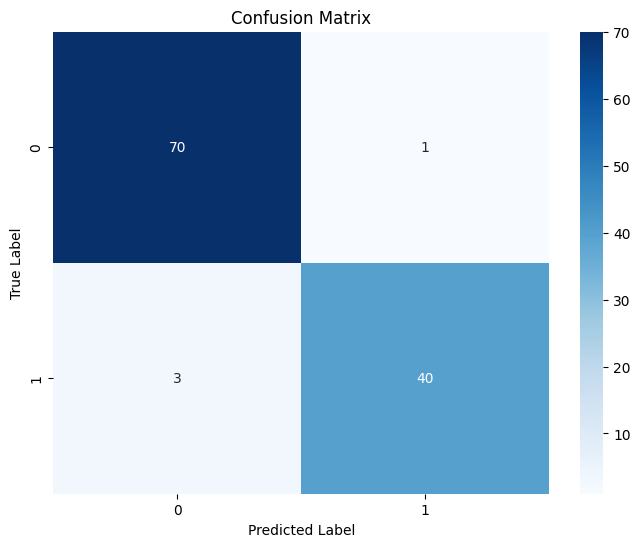

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

***Hyperparameter Tuning***

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the data (assuming you've already done this)
data = pd.read_csv('wdbc.data', header=None)

# Split data into features and labels
X = data.iloc[:, 2:]  # Features (all columns except the first 2)
y = data.iloc[:, 1]  # Labels (the second column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier object
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label for malignant
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9649122807017544
F1 Score: 0.9523809523809523
Confusion Matrix:
[[70  1]
 [ 3 40]]


**Visualization**

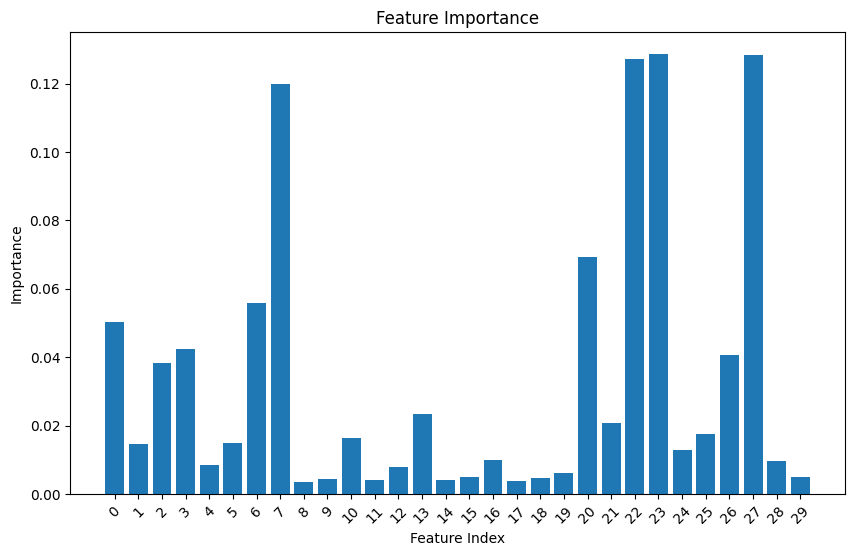

In [7]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = best_rf_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances)
plt.xticks(range(X.shape[1]), rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

**Comparing model to SVM**

In [17]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# Load the data (assuming you've already done this)
data = pd.read_csv('wdbc.data', header=None)

# ... (rest of the code for data splitting, etc.) ...

# Create an SVM classifier object with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label for malignant
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.956140350877193
F1 Score: 0.9397590361445783
Confusion Matrix:
[[70  1]
 [ 4 39]]


In [18]:
# Create an SVM classifier object with an 'rbf' kernel
svm_model = SVC(kernel='linear', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# ... (your existing code with GridSearchCV) ...

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_svm_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='M')  # Assuming 'M' is the positive label for malignant
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Best Hyperparameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.9473684210526315
F1 Score: 0.9285714285714286
Confusion Matrix:
[[69  2]
 [ 4 39]]


**Feature Scaling**

In [22]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix

# Load the data
data = pd.read_csv('wdbc.data', header=None)

# Split data into features and labels
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)


# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier object with an 'rbf' kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = svm_model.predict(X_test_scaled)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='M')
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9824561403508771
F1 Score: 0.9761904761904762
Confusion Matrix:
[[71  0]
 [ 2 41]]


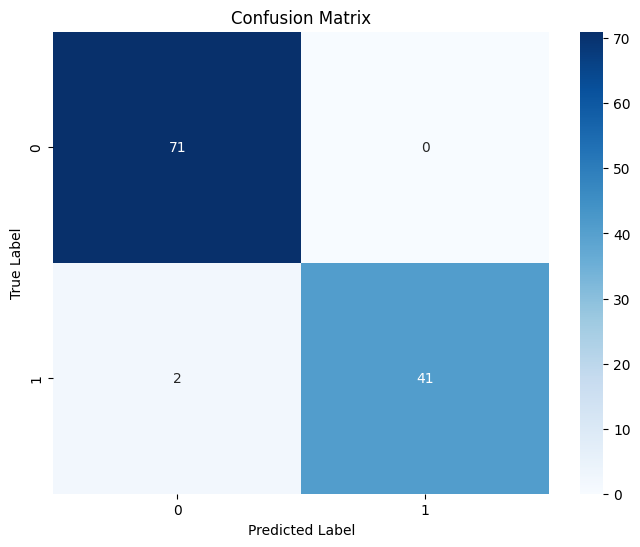

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()